In [1]:
import pandas as pd
import h5py

In [2]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')
set_matplotlib_formats('retina', 'png')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

import mpld3

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

# lowess for plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

In [25]:
h5 = h5py.File('../steps/clues/clues_2_136176805_CEU.h5.h5', 'r')

In [26]:
for key, val in h5.attrs.items():
#     print(key, val)
    print(key, val.shape)

freqs (115,)
iHat ()
iSel (1,)
jHat ()
popsize (40,)
sGrid (50,)
sHat ()
samplingPopsize (40,)
t (40,)
tHat ()
xHat (39,)
xHatHi (39,)
xHatLo (39,)


In [27]:
for key, val in h5.items():
    print(key, val.shape)

logImportanceWeights (50, 1, 21)
logLikelihoodRatios (50, 1)
xMargs (39, 115)


In [28]:
h5['logImportanceWeights'][0]

array([[-181.39753723, -209.50479095, -191.37892908, -199.24777258,
        -211.60097568, -207.91568695, -209.90705285, -209.48938292,
        -189.37771926, -203.46732037, -188.42377355, -188.04441472,
        -206.16308045, -208.40610439, -200.93429841, -201.85207626,
        -192.56836947, -202.56863555, -196.37498223, -213.33769903,
        -189.20535933]])

In [29]:
h5['logLikelihoodRatios'][:10]

array([[0.        ],
       [0.09194991],
       [0.20719728],
       [0.35181277],
       [0.53353358],
       [0.76225807],
       [1.05069704],
       [1.41522592],
       [1.8769826 ],
       [2.4632399 ]])

In [30]:
h5['xMargs']

<HDF5 dataset "xMargs": shape (39, 115), type "<f8">

In [31]:
# ax = sns.heatmap(h5['xMargs']) ;
# ax.invert_yaxis()

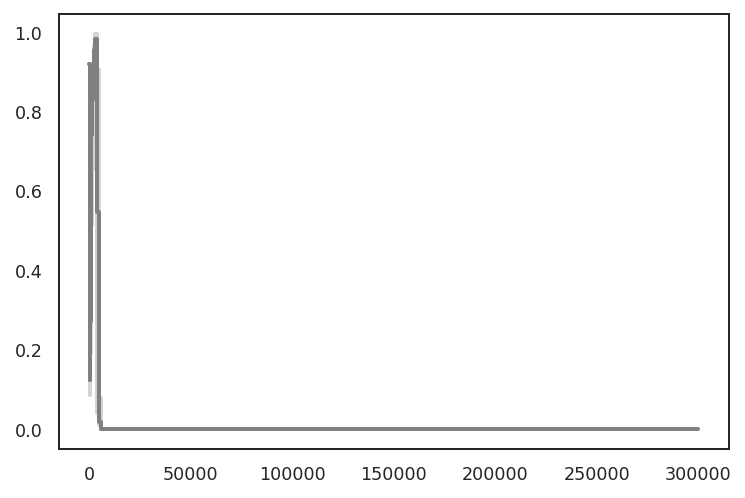

In [32]:
df = pd.DataFrame(dict(start=h5.attrs['t'][:-1], 
                       end=h5.attrs['t'][1:], 
                       freq=h5.attrs['xHat'],
                       upper=h5.attrs['xHatHi'],
                       lower=h5.attrs['xHatLo']
                           ))

plot_df = stairs(df)
with sns.axes_style('white'):
    plt.plot(plot_df.pos, plot_df.upper, color='lightgrey', linewidth=2)
    plt.plot(plot_df.pos, plot_df.lower, color='lightgrey', linewidth=2)
    plt.plot(plot_df.pos, plot_df.freq, color='grey', linewidth=2)

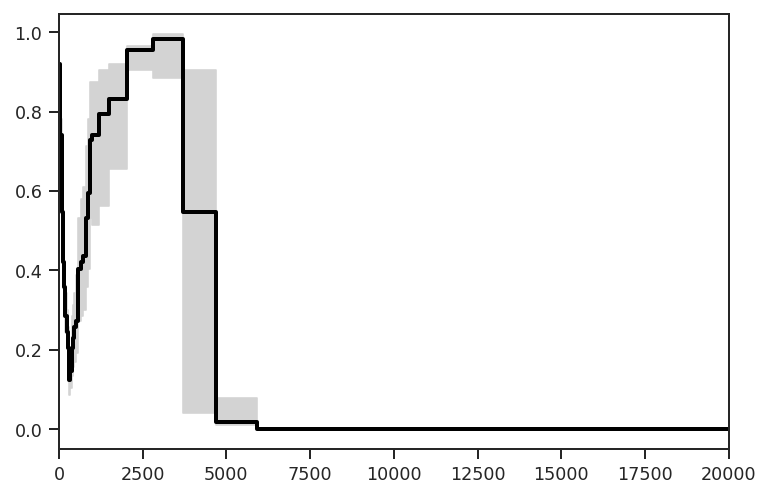

In [35]:
plot_df = stairs(df)
with sns.axes_style('ticks'):
    plt.fill_between(plot_df.pos, plot_df.upper, plot_df.lower, color='lightgrey')
    plt.plot(plot_df.pos, plot_df.freq, color='black', linewidth=2)
#    sns.despine()
    plt.xlim(0, 20000)

In [21]:
logLikeliboodRatio = h5['logLikelihoodRatios'][h5.attrs['iHat'], h5.attrs['jHat']]
selection_coefihcient = h5.attrs['sHat']

In [22]:
logLikeliboodRatio, selection_coefihcient

(0.0, 1e-05)